In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import timeit

In [2]:
dataset_setosa = pd.read_csv("datasets/iris/df_setosa_d", sep=',')
dataset_versicolor = pd.read_csv("datasets/iris/df_versicolor_d", sep=',')
dataset_virginica = pd.read_csv("datasets/iris/df_virginica_d", sep=',')

In [3]:
df_setosa_train = dataset_setosa.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_setosa_class = dataset_setosa[["d1", "d2", "d3"]]

In [4]:
setosa_class = []
for st in range(0, len(df_setosa_class)):
    setosa_class.append([df_setosa_class.d1[st], df_setosa_class.d2[st], df_setosa_class.d3[st]])

In [5]:
df_versicolor_train = dataset_versicolor.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_versicolor_class = dataset_versicolor[["d1", "d2", "d3"]]

In [6]:
versicolor_class = []
for ver in range(0, len(df_versicolor_class)):
    versicolor_class.append([df_versicolor_class.d1[ver], df_versicolor_class.d2[ver], df_versicolor_class.d3[ver]])

In [7]:
df_virginica_train = dataset_virginica.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_virginica_class = dataset_virginica[["d1", "d2", "d3"]]

In [ ]:
virginica_class = []
for vir in range(0, len(df_virginica_class)):
    virginica_class.append([df_virginica_class.d1[vir], df_virginica_class.d2[vir], df_virginica_class.d3[vir]])

In [ ]:
new_df_setosa_train = df_setosa_train.drop(["petal length (cm)", "petal width (cm)"], axis=1, inplace=False)
new_df_versicolor_train = df_versicolor_train.drop(["petal length (cm)", "petal width (cm)"], axis=1, inplace=False)
new_df_virginica_train = df_virginica_train.drop(["petal length (cm)", "petal width (cm)"], axis=1, inplace=False)

In [ ]:
class Perceptron_simples():
    
    def __init__(self, amostras_entrada, saidas, taxa_aprendizado=0.05, epocas=200, bias=-1, num_neuronios=3):
        self.amostras_entrada = amostras_entrada
        self.saidas = saidas
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.bias = bias
        self.num_neuronios = num_neuronios
        self.num_amostras = len(amostras_entrada) # número de padrões do meu dataset
        self.num_atributos = len(amostras_entrada[0]) # número de colunas do mue dataset
        self.vetor_pesos = np.zeros((self.num_neuronios, self.num_atributos + 1))
        
    def treino_rede(self):
        
        for amostra in self.amostras_entrada:
            amostra.insert(0, self.bias)
        
        
        for b in range(self.num_neuronios):
            for c in range(self.num_atributos + 1):
                self.vetor_pesos[b][c] = (random.random())
   
        num_epocas = 0 
        
        while True:
        
            erro = False
            
            for i in range(self.num_amostras):
                u = np.zeros(self.num_neuronios)
                
                y_saida = []
                
                for b in range(self.num_neuronios):
                    y_saida.append([])
                    for j in range(self.num_atributos + 1): 
                        u[b] += self.vetor_pesos[b][j] * self.amostras_entrada[i][j] 
                        
                    y_saida[b] = self.valor_saida(u[b])
                
                
                if np.any(y_saida != self.saidas[i]):
                    
                    erro_true = np.subtract(self.saidas[i], y_saida)                    
                    vet_erro = np.array([[erro_true[0]*self.sigmoid_(y_saida[0])], [erro_true[1]*self.sigmoid_(y_saida[1])], [erro_true[2]*self.sigmoid_(y_saida[2])]])
                    self.vetor_pesos = self.vetor_pesos + self.taxa_aprendizado * vet_erro * self.amostras_entrada[i]
                    erro = True 
            
            num_epocas += 1 
            
            if not erro or num_epocas >= self.epocas:
                break
                        
    def teste_rede(self, new_amostras): 
        
        new_amostras.insert(0, self.bias)
        u = np.zeros(self.num_neuronios)
                
        y_saida = []

        for b in range(self.num_neuronios):
            y_saida.append([])
            for j in range(self.num_atributos + 1): 
                u[b] += self.vetor_pesos[b][j] * new_amostras[j] 

            y_saida[b] = self.valor_saida(u[b])
            
            
        return y_saida
        
        
    def valor_saida(self, u):
        
        sig = 1 / (1 + np.exp(-u))
        
        if sig > 0.5:
            return 1
        else:
            return 0
   
    def sigmoid_(self, x):
        
        sig = 1 / (1 + np.exp(-x))

        return sig * (1 - sig)

In [ ]:
def data_test(train_data, class_data, test_size, n_iter):
    
    start = timeit.default_timer()
    
    acc_final = []
    std_final = []

    for rep in range(1 , n_iter + 1):
        X_train, X_test, y_train, y_test = train_test_split(train_data,class_data, 
                                                            test_size=test_size, shuffle=True)

        amostras = X_train.values.tolist()
        saidas = y_train
        new_amotras = X_test.values.tolist()
        amostra_teste = y_test

        rede = Perceptron_simples(amostras, saidas)
        rede.treino_rede()

        classe_predita = []

        for pd in range(len(new_amotras)):
            y = rede.teste_rede(new_amotras[pd])
            classe_predita.append(y)
        
        
        acc_parcial = []
        for h in range(len(classe_predita)):
            acc = metrics.accuracy_score(amostra_teste[h], classe_predita[h])
            acc_parcial.append(acc)

        acc_final.append(np.mean(acc_parcial))
        std_final.append(np.std(acc_parcial))

    acc_real = np.mean(acc_final)
    std_real = np.mean(std_final)
    print("Acurácia Final = {}, Desvio Padrão Final = {}" .format(acc_real, std_real))
    
    stop = timeit.default_timer()
    print('Time: ', stop - start) 
    
    return rede, classe_predita, new_amotras

In [ ]:
rede_setosa, _, _ = data_test(df_setosa_train, setosa_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.9977777777777778, Desvio Padrão Final = 0.013261709932718116
Time:  1.1905487999999993


In [ ]:
rede_versicolor, _, _ = data_test(df_versicolor_train, versicolor_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.8855555555555554, Desvio Padrão Final = 0.151436647596359
Time:  42.855988513999996


In [ ]:
rede_virginica, _, _ = data_test(df_virginica_train, virginica_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.8859259259259258, Desvio Padrão Final = 0.15261229610138666
Time:  36.74533537200001


In [ ]:
import pandas as pd
dataset_art_1 = pd.read_csv("datasets/artificial_1/df_artificial_1", sep=',')

In [ ]:
dataset_art_1_train = dataset_art_1.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
dataset_art_1_class = dataset_art_1[["d1", "d2", "d3"]]

In [ ]:
art_1_class = []
for art in range(0, len(dataset_art_1_class)):
    art_1_class.append([dataset_art_1_class.d1[art], dataset_art_1_class.d2[art], dataset_art_1_class.d3[art]])

In [ ]:
rede_art, _, _ = data_test(dataset_art_1_train, art_1_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.992962962962963, Desvio Padrão Final = 0.03581612847115052
Time:  3.9542184380000123


In [ ]:
classe_predita = []

for i in np.arange(0,1.05,0.05):
    for k in np.arange(0,1.05,0.05):
        par = [i,k]
        y = rede_art.teste_rede(par)
        classe_predita.append([par[1], par[2], y])

In [ ]:
x1 = []
x2 = []
cl = []

for i in range(0, len(classe_predita)):
    plt_x = classe_predita[i][0]
    plt_y = classe_predita[i][1]
    x1.append(plt_x)
    x2.append(plt_y)
    classe = classe_predita[i][2]  
    if classe == [1,0,0]:
        cl.append(1)
    elif classe == [0,1,0]:
        cl.append(2)
    elif classe == [0,0,1]:
        cl.append(3)
    else:
        cl.append(4)

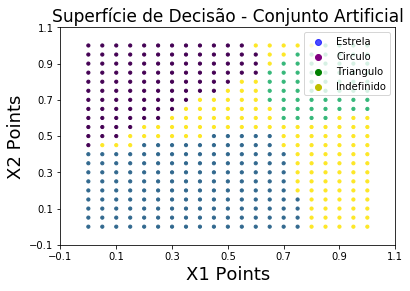

In [ ]:
%matplotlib inline
plt.scatter(x1, x2, c=cl, marker='o', s=10)
plt.scatter([], [], alpha=0.7, c="b", label="Estrela")
plt.scatter([], [], alpha=1, c="purple", label="Circulo")
plt.scatter([], [], alpha=1, c="g", label="Triangulo")
plt.scatter([], [], alpha=1, c="y", label="Indefinido")
plt.legend()

plt.xticks(np.arange(-0.1, 1.2, step=0.2))
plt.yticks(np.arange(-0.1, 1.2, step=0.2))
plt.xlabel("X1 Points", fontsize=18);
plt.ylabel("X2 Points", fontsize=18);
plt.title("Superfície de Decisão - Conjunto Artificial", fontsize=17);

In [ ]:
dataset_iris = pd.read_csv("datasets/iris/df_iris", sep=',')

In [ ]:
dataset_iris_train = dataset_iris.drop(["d_set", "d_vers", "d_virg"], axis=1, inplace=False)
dataset_iris_class = dataset_iris[["d_set", "d_vers", "d_virg"]]

In [ ]:
df_iris_class = []
for art in range(0, len(dataset_iris_class)):
    df_iris_class.append([dataset_iris_class.d_set[art], dataset_iris_class.d_vers[art], dataset_iris_class.d_virg[art]])

In [ ]:
rede_iris, _, _ = data_test(dataset_iris_train, df_iris_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.8674074074074072, Desvio Padrão Final = 0.1736328985111205
Time:  37.484602757000005


In [ ]:
import pandas as pd
dataset_coluna = pd.read_csv("datasets/coluna_vertebral/df_coluna", sep=',')
df_coluna_train = dataset_coluna.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_coluna_class = dataset_coluna[["d1", "d2", "d3"]]

In [ ]:
rede, clas, new_am = data_test(df_coluna_train, df_coluna_class.values.tolist(), test_size=0.3, n_iter=20)

In [ ]:
new_df_iris_train = dataset_iris_train.drop(["petal length (cm)", "petal width (cm)"], axis=1, inplace=False)

In [ ]:
rede, clas, new_am = data_test(new_df_iris_train, df_iris_class, test_size=0.3, n_iter=20)

x1 = []
x2 = []
cl = []

for i in range(0, len(clas)):
    plt_x = new_am[i][1]
    plt_y = new_am[i][2]
    x1.append(plt_x)
    x2.append(plt_y)
    #classe = clas[i][2]  
    if clas[i] == [1,0,0]:
        cl.append(1)
    elif clas[i] == [0,1,0]:
        cl.append(2)
    elif clas[i] == [0,0,1]:
        cl.append(3)
    else:
        cl.append(4)

%matplotlib inline
plt.scatter(x1, x2, c=cl, marker='o', s=30, cmap="coolwarm")
plt.xlabel("X1 Points", fontsize=18);
plt.ylabel("X2 Points", fontsize=18);
plt.title("Superfície de Decisão - Conjunto Artificial", fontsize=17);